# **IMPORT LIBRARIES**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from matplotlib import _cm
from matplotlib.colors import Normalize
import matplotlib as matplotlib



## **Import DataSet**


In [2]:

path = "C:/Users/vishal rathod/Desktop/Project_data_analysis/Sales_data"

csv_files = [i for i in os.listdir(path) if i.endswith(".csv")]

dfs=[]
for i in csv_files:
    DF=pd.read_csv(path+"//"+i)
    dfs.append(DF)

 
df = pd.concat(dfs, ignore_index=True)


In [3]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape  #checking the data frame size


(186850, 6)

## **Checking Null Values and Treating Them**


In [5]:
df.isnull().sum()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.isnull().all(axis = 1).sum() #checking complete row is null or not 


545

## **Removing null values from data frame**


In [7]:
df.dropna(how = "all",inplace = True) #removing null from complete rows 


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
df.duplicated().sum()


618

## **Remove duplicates from dataset**


In [10]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated()


0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185687, dtype: bool

In [11]:
df.shape


(185687, 6)

## **Checking Unique Values in each columns**


In [12]:
unique={}
for i in df.columns:
    unique[i]=df[i].unique()

unique


{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
        'Product'], dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
       dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
        '150.0', '300.0', '400.0'], dtype=o

In [13]:
df.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## **Removing inconsistance data from columns**


In [14]:
unique={}
for i in df.columns:
    df = df.drop(df[df[i]==i].index)
    unique[i] = df[i].unique()
unique


{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
       dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0'], dtype=object),
 'Order Date': array(['04/19/19 08:46', '04/0

## **Checking Inconsistent Data Types**


In [15]:
df.dtypes #checking data types of all columns


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## **Renaming Columns name**


In [16]:
df.rename(columns={'Order ID': 'Order_id', 'Product': 'Product_name','Quantity Ordered':'Quantity_Ordered',
                        'Price Each':'Product_price','Order Date':'Order_date','Purchase Address':'Purchase_address'},
               inplace=True)


In [17]:
df.columns


Index(['Order_id', 'Product_name', 'Quantity_Ordered', 'Product_price',
       'Order_date', 'Purchase_address'],
      dtype='object')

## **Checking Inconsistent Values in data frame**


In [18]:
v_count={}

for i in df.columns:
    v_count[i] = df[i].value_counts()

v_count


{'Order_id': Order_id
 160873    5
 296353    4
 304802    4
 235798    4
 194253    4
          ..
 158126    1
 158127    1
 158128    1
 158129    1
 259357    1
 Name: count, Length: 178437, dtype: int64,
 'Product_name': Product_name
 USB-C Charging Cable          21859
 Lightning Charging Cable      21610
 AAA Batteries (4-pack)        20612
 AA Batteries (4-pack)         20558
 Wired Headphones              18849
 Apple Airpods Headphones      15525
 Bose SoundSport Headphones    13298
 27in FHD Monitor               7498
 iPhone                         6840
 27in 4K Gaming Monitor         6225
 34in Ultrawide Monitor         6174
 Google Phone                   5522
 Flatscreen TV                  4794
 Macbook Pro Laptop             4721
 ThinkPad Laptop                4126
 20in Monitor                   4098
 Vareebadd Phone                2065
 LG Washing Machine              666
 LG Dryer                        646
 Name: count, dtype: int64,
 'Quantity_Ordered': Quantity_

## **Changing Data Type of columns according to data**


In [19]:
df["Order_id"]=df["Order_id"].astype(int)
df["Quantity_Ordered"]=df["Quantity_Ordered"].astype(int)
df["Product_price"]=df["Product_price"].astype(float)
df['Order_date'] = pd.to_datetime(df['Order_date'], format='%m/%d/%y %H:%M')

df


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


## **Seperating months name or date from Datetime Column**


In [20]:
df['Order_date'] = pd.to_datetime(df['Order_date']) # it will give months no.
df['Month_name']=df['Order_date'].dt.strftime('%B') # it will give complete months names 

#df['Months_names'] = df['Order_date'].dt.strftime('%b') # it will give only starting 3 char of months 
df['Dates'] = df['Order_date'].dt.date  # Its will seperate Date from Datetime 
df['Time']=df['Order_date'].dt.time
df['Day']=df['Order_date'].dt.day_name()
df['Hour'] = df["Order_date"].dt.hour

df


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,2019-04-30,09:27:00,Tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,2019-09-17,20:56:00,Tuesday,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,2019-09-01,16:00:00,Sunday,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,2019-09-23,07:39:00,Monday,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,2019-09-19,17:30:00,Thursday,17


## **Seperate Numerical and Categorical Data**


In [21]:
cat=df[[i for i in df.columns if df[i].dtype=="object"]]
num=df[[i for i in df.columns if df[i].dtype in ['int32', 'float64'] and i not in ["Order_id"]]]
num


,Quantity_Ordered,Product_price,Hour
0,2,11.95,8
2,1,99.99,22
3,1,600.00,14
4,1,11.99,14
5,1,11.99,9
...,...,...,...
186845,3,2.99,20
186846,1,700.00,16
186847,1,700.00,7
186848,1,379.99,17


## **Check Outlier in data set**


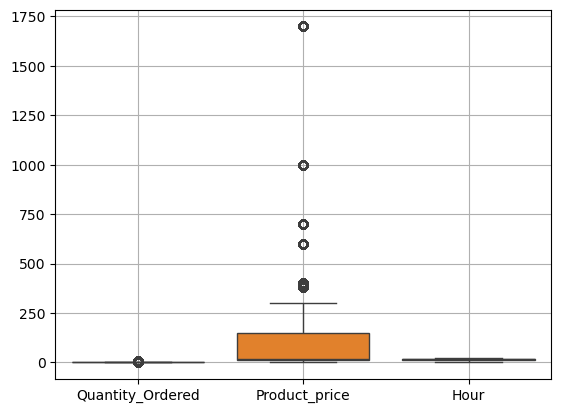

In [22]:
sns.boxplot(num)
plt.gca().grid(True)
plt.show()


## **Finding q1 , q3 and IQR to check outlier**


In [23]:
q1 = num.quantile(.25)
q3 = num.quantile(.75)
IQR = q3-q1

IQR_upper = (q3+1.5*IQR)
IQR_lower = (q1-1.5*IQR)
IQR_upper


Quantity_Ordered      1.000
Product_price       357.075
Hour                 31.000
dtype: float64

## **Removing outliers by replacing mean**


In [24]:
df.head()


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,2019-04-30,09:27:00,Tuesday,9


In [25]:
df.loc[(df["Product_price"] > 357.075) | (df["Product_price"] < -195.125), "Product_price"] = df["Product_price"].mean()


<Axes: ylabel='Product_price'>

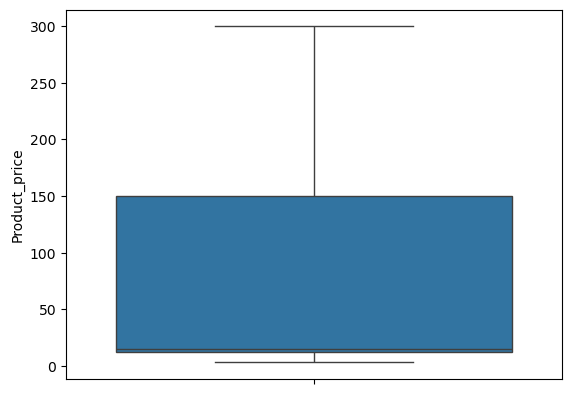

In [26]:
sns.boxplot(df["Product_price"])


## **Describe data to check max, min,count, mean**


In [27]:
num.describe()


,Quantity_Ordered,Product_price,Hour
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,14.412934
std,0.443069,332.843838,5.423329
min,1.000000,2.990000,0.000000
25%,1.000000,11.950000,11.000000
50%,1.000000,14.950000,15.000000
75%,1.000000,150.000000,19.000000
max,9.000000,1700.000000,23.000000


## **Performing Analysis on Data Frame**


In [28]:
df.head(7)


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,2019-04-30,09:27:00,Tuesday,9
6,176562,USB-C Charging Cable,1,11.950000,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",April,2019-04-29,13:03:00,Monday,13
7,176563,Bose SoundSport Headphones,1,99.990000,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",April,2019-04-02,07:46:00,Tuesday,7


## **Inserting, between (state and ZIP)**


In [29]:
# splitting the address by the last two components (state and ZIP)
state_zip_split = df['Purchase_address'].str.rsplit(n=1,expand = True)

#inserting a comma between the state and zip code

state_zip_split[0] = state_zip_split[0] + ','

df['Purchase_address'] = state_zip_split[0] + state_zip_split[1]

df.head()


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX,75001",April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,02215",April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,90001",April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,90001",April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA,90001",April,2019-04-30,09:27:00,Tuesday,9


In [30]:
# Separate specific characters from 'Purchase_address' column
df['Street'] = df['Purchase_address'].str.split(',').str[0]
df['City'] = df['Purchase_address'].str.split(',').str[1]
df['State'] = df['Purchase_address'].str.split(',').str[2]
df['ZIP'] = df['Purchase_address'].str.split(',').str[3]


df.head(3)
df.shape


(185686, 15)

# **Data Visualization**


## **Finding Sales trends month wise**


In [31]:
month_sale = df[['Product_price','Month_name']].groupby('Month_name').sum().sort_values('Product_price')
percent_sales = (month_sale/month_sale['Product_price'].sum()*100).round(2)
percent_sales.sort_values('Month_name',ascending = True)


,Product_price
Month_name,
April,9.81
August,6.53
December,13.39
February,6.46
January,5.28
July,7.75
June,7.44
March,8.17
May,8.89


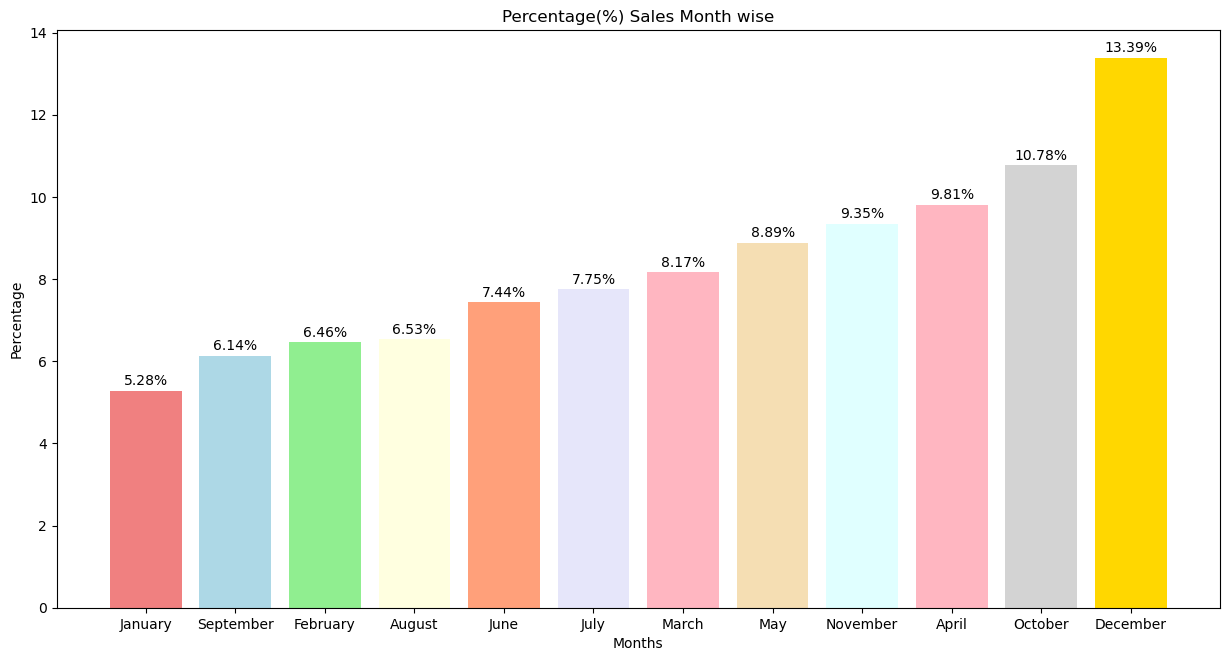

In [32]:
# Assuming 'percent_sales' is a DataFrame with 'Product_price' and 'index' representing months
plt.figure(figsize=(15, 7.5))  # Corrected the argument name for figsize

plt.bar(x=percent_sales.index, height=percent_sales['Product_price'],
        color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightsalmon', 'lavender', 
               'lightpink', 'wheat', 'lightcyan', 'lightpink', 'lightgray', '#FFD700'])  # Replaced with hex color code for gold

offset = max(percent_sales['Product_price']) * 0.01

for i, j in enumerate(percent_sales['Product_price']):
    plt.text(percent_sales.index[i], j + offset, f'{j}%', ha='center')  # Corrected plt.txt to plt.text

plt.title("Percentage(%) Sales Month wise")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.show()


## **What is preferred Day most people placed orders**


In [33]:
sales_day = df[['Day','Order_id']].groupby('Day').count().sort_values('Order_id',ascending = True)
#percentage_sale_day = sale_day/sale_day.sum()*100

sales_day


,Order_id
Day,
Friday,26214
Thursday,26418
Wednesday,26438
Saturday,26453
Monday,26508
Sunday,26518
Tuesday,27137


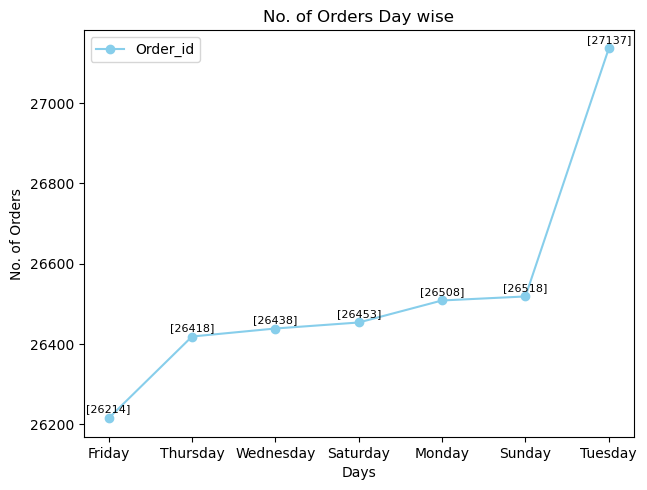

In [34]:
offset = 10
sales_day.plot(color = 'skyblue',marker='o',linestyle = '-')

for i,j in enumerate(sales_day.values):
    plt.text(i,j+offset,str(j),ha='center',va='bottom',fontsize = 8)

plt.tight_layout()
plt.title("No. of Orders Day wise")
plt.xlabel("Days")
plt.ylabel("No. of Orders")
plt.show()


## **Finding Top 5 most selling products**


In [35]:
top_sales_product = df[['Product_name','Quantity_Ordered']].groupby('Product_name').sum().sort_values('Quantity_Ordered',ascending=False).head(5)
top_sales_product


,Quantity_Ordered
Product_name,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524


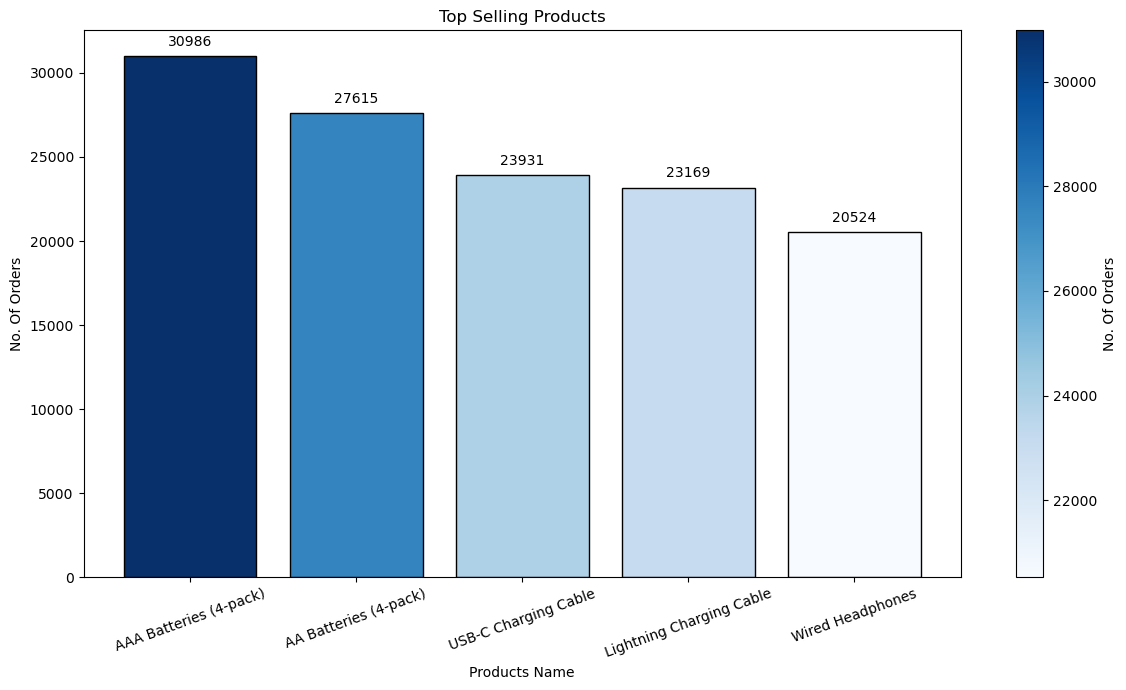

In [36]:
# assuming top_sales_product is a pandas DataFrame

cmap = plt.get_cmap('Blues')  # or cmap = matplotlib.colormaps['Blues']

normalize = plt.Normalize(vmin=top_sales_product['Quantity_Ordered'].min(), vmax=top_sales_product['Quantity_Ordered'].max())

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(x=top_sales_product.index, height=top_sales_product['Quantity_Ordered'],
              color=cmap(normalize(top_sales_product['Quantity_Ordered'])), edgecolor='black')

# Colorbar ko Axes object ke saath associate kar rahe hain
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=normalize, cmap=cmap), ax=ax)
cbar.set_label('No. Of Orders')
offset = max(top_sales_product['Quantity_Ordered']) * 0.02

for i, j in enumerate(top_sales_product['Quantity_Ordered']):
    ax.text(top_sales_product.index[i], j + offset, str(j), ha='center')

ax.set_title('Top Selling Products')
ax.set_xlabel('Products Name')
ax.set_ylabel('No. Of Orders')
ax.tick_params(axis='x', labelrotation=20)
plt.tight_layout()
plt.show()


## **Which state ordering more products**


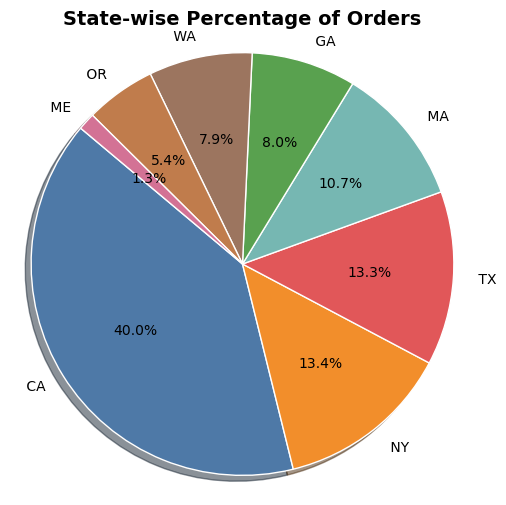

In [37]:
import matplotlib.pyplot as plt

# Calculate state order counts and their percentages
state_order = df[['Order_id', 'State']].groupby('State').count().sort_values('Order_id', ascending=False)
percent_order_state = (state_order / state_order.sum() * 100).round(2)

# Define a clean and modern color palette
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#9c755f', '#c07c4c', '#d37295', '#c3e6c5']

# Plotting the pie chart with a clean color palette
plt.figure(figsize=(6, 6))

# Plotting the pie chart with specified colors
plt.pie(percent_order_state['Order_id'], 
        labels=percent_order_state.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        shadow=True,         # Add shadow for a 3D effect
        wedgeprops=dict(edgecolor='w', linewidth=1))  # White edge color for a clean look

plt.title('State-wise Percentage of Orders', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


In [38]:
percent_order_state


,Order_id
State,
CA,39.97
NY,13.38
TX,13.30
MA,10.72
GA,8.00
WA,7.92
OR,5.38
ME,1.32


## **How price is distributed understanding by Violin Plot**


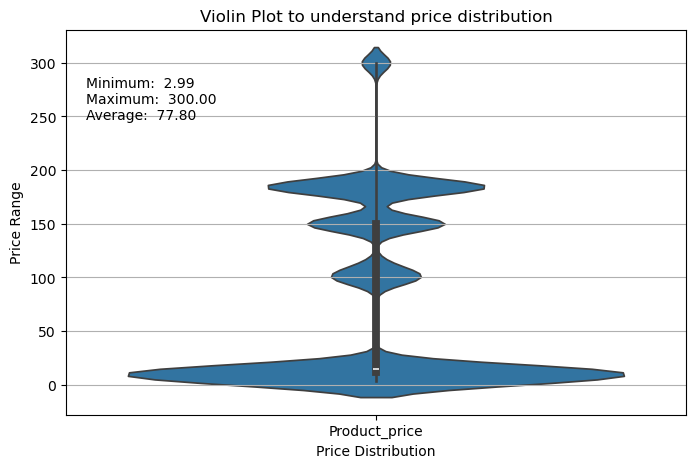

In [39]:

data = df[['Product_price']]

plt.figure(figsize=(8,5))

#create a violin plot
sns.violinplot(data)

minimum = np.min(data)
maximum = np.max(data)
average = np.mean(data)

plt.title('Violin Plot to understand price distribution')
plt.xlabel('Price Distribution')
plt.ylabel('Price Range')
plt.figtext(0.15,0.7,f'Minimum: {minimum: .2f}\nMaximum: {maximum: .2f}\nAverage: {average: .2f}',fontsize =10,ha = 'left')

plt.grid(axis = 'y')
plt.show()


# **Understanding price distribution sales trends by histogram**​


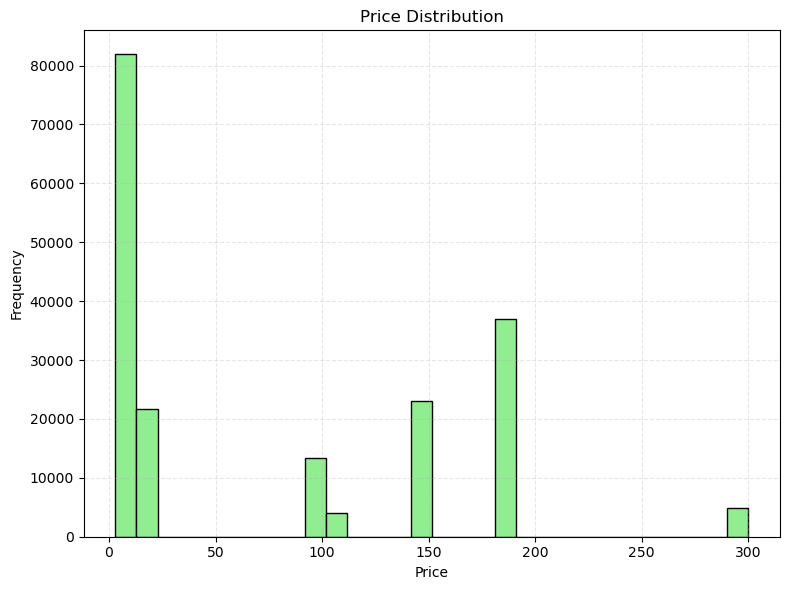

In [40]:
plt.figure(figsize=(8, 6))
prices=df['Product_price']
plt.hist(prices, bins=30, color='lightgreen', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


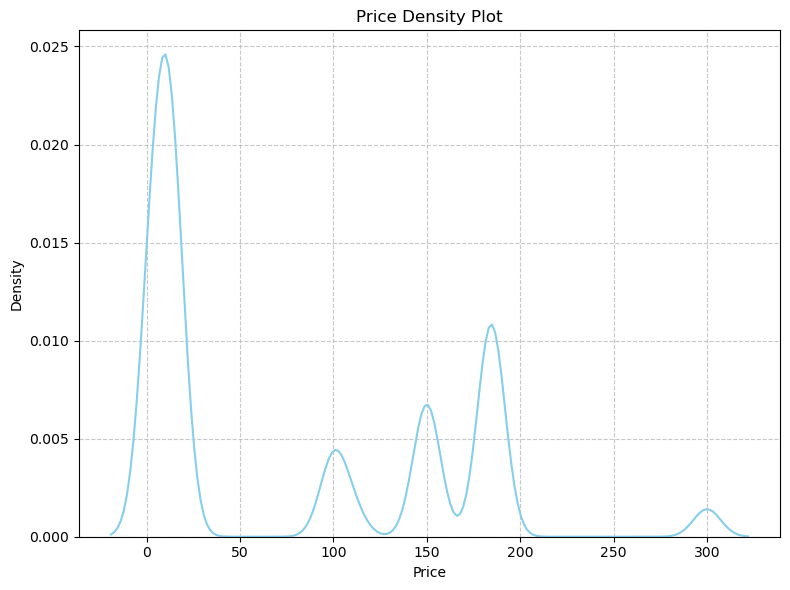

In [41]:
plt.figure(figsize=(8, 6))
sns.kdeplot(prices, color='skyblue')
plt.title('Price Density Plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Finding correlation between the quantity ordered and the product price**


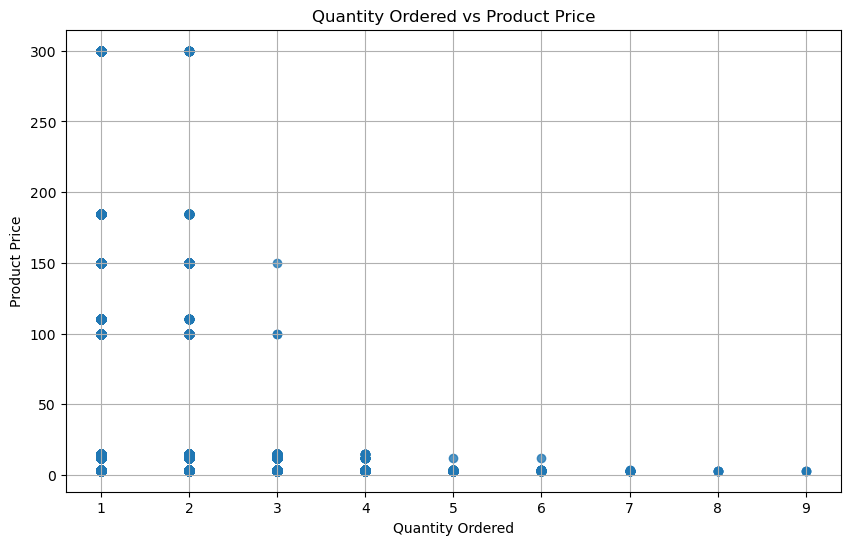

In [42]:
# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity_Ordered'], df['Product_price'], alpha=.8)
plt.title('Quantity Ordered vs Product Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Price')
plt.grid(True)

plt.show()


## **How many percentage(%) quantity orders based on products name**


In [43]:
quantity_by_product = df[['Quantity_Ordered','Product_name']].groupby('Product_name').sum().sort_values('Quantity_Ordered')
percentage_order_product= (quantity_by_product/quantity_by_product["Quantity_Ordered"].sum()*100).round(2)
percentage_order_product


,Quantity_Ordered
Product_name,
LG Dryer,0.31
LG Washing Machine,0.32
Vareebadd Phone,0.99
20in Monitor,1.98
ThinkPad Laptop,1.98
Macbook Pro Laptop,2.26
Flatscreen TV,2.30
Google Phone,2.65
34in Ultrawide Monitor,2.97


<Figure size 1600x900 with 0 Axes>

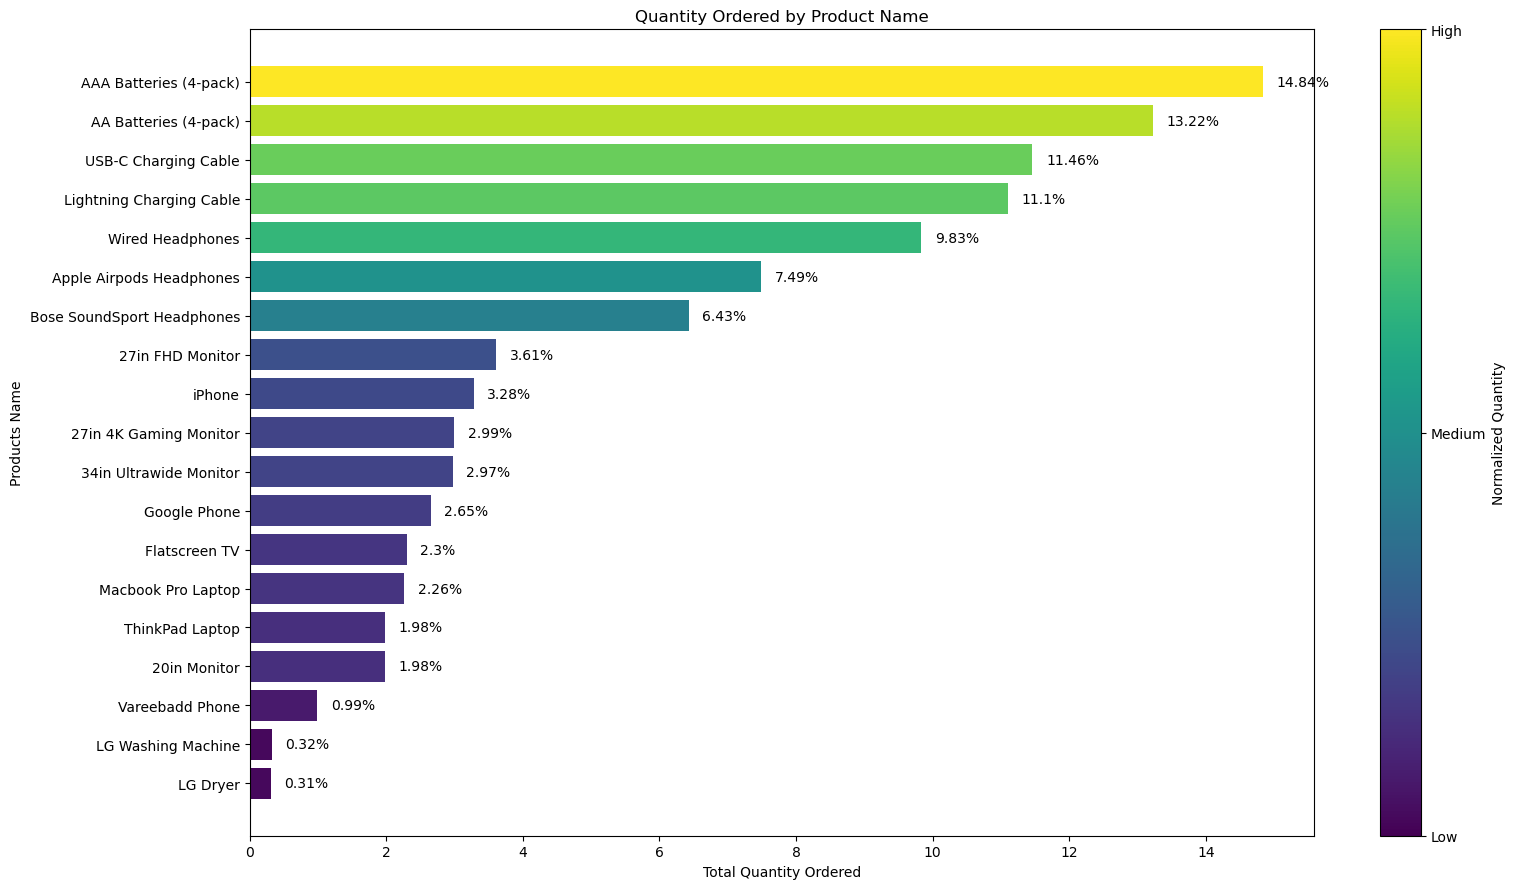

In [44]:
import numpy as np


plt.figure(figsize=(16, 9))

# Quantities and normalization
quantities = percentage_order_product['Quantity_Ordered']
normalized_quantities = np.array(quantities) / max(quantities)

# Define a new colormap
cmap = plt.get_cmap('viridis')  # Try different colormaps like 'viridis', 'plasma', or 'cividis'

# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the horizontal bar chart with the colormap
bars = ax.barh(percentage_order_product.index, 
               percentage_order_product['Quantity_Ordered'], 
               color=cmap(normalized_quantities))

# Add values on the right side of bars
for i, j in enumerate(percentage_order_product['Quantity_Ordered']):
    ax.text(j + 0.2, i, str(f"{j}%"), va='center')

# Create a ScalarMappable object for the colorbar
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add color bar to the figure
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Normalized Quantity')
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['Low', 'Medium', 'High'])

# Set plot titles and labels
ax.set_title('Quantity Ordered by Product Name')
ax.set_xlabel('Total Quantity Ordered')
ax.set_ylabel('Products Name')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## **Products order trends each hours in day**


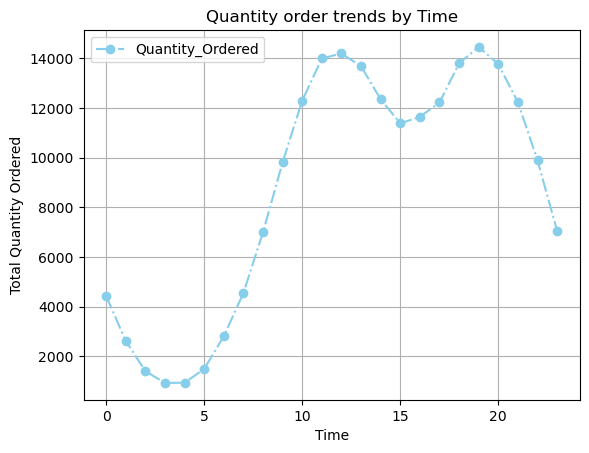

In [45]:
time_order = df[['Quantity_Ordered',"Hour"]].groupby("Hour").sum()

time_order.plot(kind='line', color='skyblue', marker='o', linestyle='-.',grid=True)
plt.title('Quantity order trends by Time')
plt.xlabel('Time')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


In [46]:
time_order


,Quantity_Ordered
Hour,
0,4420
1,2616
2,1397
3,927
4,935
5,1492
6,2809
7,4547
8,6998


## **How much percentage(%) product orders by each Cities**


In [47]:
Order_City= df[["City","Quantity_Ordered"]].groupby("City").sum().sort_values("Quantity_Ordered",ascending=False)
percentage_order= (Order_City/Order_City["Quantity_Ordered"].sum()*100).round(2)
percentage_order
Order_City


,Quantity_Ordered
City,
San Francisco,50169
Los Angeles,33247
New York City,27903
Boston,22494
Dallas,16707
Atlanta,16584
Seattle,16534
Portland,14037
Austin,11137


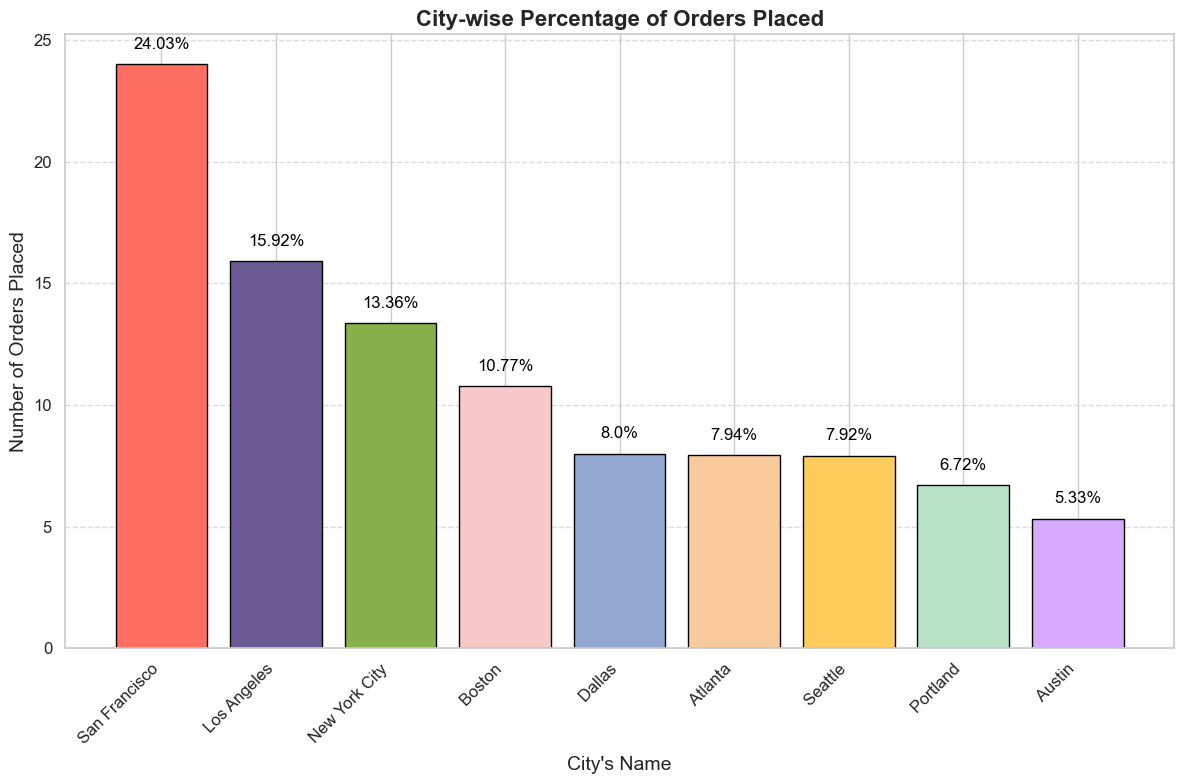

In [48]:
sns.set(style="whitegrid")

# Define a custom color palette
custom_colors = [
    "#FF6F61", # Coral
    "#6B5B95", # Indigo
    "#88B04B", # Olive Green
    "#F7CAC9", # Light Pink
    "#92A8D1", # Light Blue
    "#F9CB9C", # Peach
    "#FFCC5C", # Yellow
    "#B9E3C6", # Light Green
    "#D5AAFF"  # Lavender
]

plt.figure(figsize=(12, 8))

# Create the bar plot
bars = plt.bar(x=percentage_order.index, height=percentage_order["Quantity_Ordered"],
               color=custom_colors[:len(percentage_order)],
               edgecolor='black')

# Add text annotations on top of the bars
offset = 0.5
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + offset,
             f"{height}%", ha="center", va="bottom", fontsize=12, color='black')

# Enhance the plot with title, labels, and grid
plt.title("City-wise Percentage of Orders Placed", fontsize=16, weight='bold')
plt.xlabel("City's Name", fontsize=14)
plt.ylabel("Number of Orders Placed", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


## **Which state contributing more on sales and orders quantity**


In [49]:
state_quantity_price=df[["State","Product_price","Quantity_Ordered"]].groupby("State").sum()

state_quantity_price["Percent Sales"]=state_quantity_price["Product_price"]/state_quantity_price["Product_price"].sum()*100
state_quantity_price["Percentage Orders"]=state_quantity_price["Quantity_Ordered"]/state_quantity_price["Quantity_Ordered"].sum()*100
state_quantity_price.drop(columns=["Product_price","Quantity_Ordered"],inplace=True)
state_quantity_price


,Percent Sales,Percentage Orders
State,,
CA,39.749607,39.947896
GA,8.088915,7.942072
MA,10.688698,10.772369
ME,1.331012,1.315059
NY,13.466587,13.362738
OR,5.372485,5.407256
TX,13.278902,13.334483
WA,8.023795,7.918127


<Figure size 1000x1000 with 0 Axes>

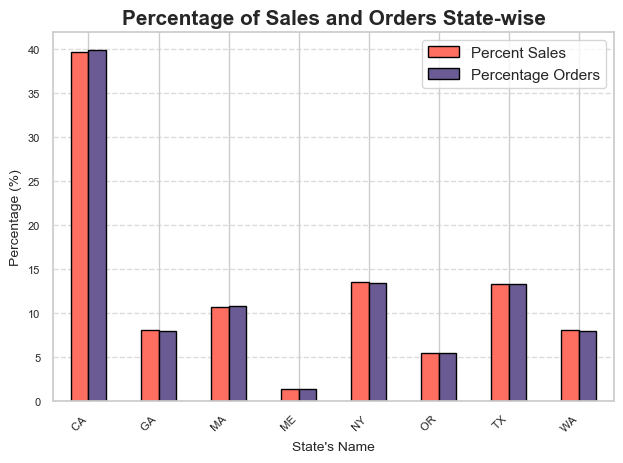

In [50]:
sns.set(style="whitegrid")

# Define a custom color palette
bar_colors = [
    "#FF6F61", # Coral
    "#6B5B95", # Indigo
    "#88B04B", # Olive Green
    "#F7CAC9", # Light Pink
    "#92A8D1", # Light Blue
    "#F9CB9C", # Peach
    "#FFCC5C", # Yellow
    "#B9E3C6", # Light Green
    "#D5AAFF"  # Lavender
]

plt.figure(figsize=(10, 10))

# Create the bar plot with custom colors
bars = state_quantity_price.plot(kind="bar", edgecolor="black", color=bar_colors[:len(state_quantity_price)])

# Enhance the plot with title, labels, and grid
plt.title("Percentage of Sales and Orders State-wise", fontsize=15, weight='bold')
plt.xlabel("State's Name", fontsize=10)
plt.ylabel("Percentage (%)", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
